<a href="https://colab.research.google.com/github/MithilaCoomaraswamy/DSGP/blob/Exercise-Recommender/Exercise_Recommendation_Data_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Loading the data set
data_set = pd.read_csv('/content/Exercise dataset.csv')

In [3]:
# Displaying first 5 rows of the data set
data_set.head()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise
0,92.085190,1.760250,29.719488,59,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
1,61.089124,1.595499,23.997776,25,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
2,82.454037,1.816538,24.987499,50,normal,4,Moderate Weight Training (Full Body Workout); ...,Jump Rope; High Knees; Planks; Squats and Lung...
3,101.713306,1.790696,31.720047,62,obese,6,"Low-Impact Cardio (Elliptical, Cycling); Seate...",Chair Squats; Modified Plank; Seated Leg Lifts...
4,62.347337,1.543259,26.178219,35,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...


In [4]:
# Displaying last 5 rows in the data set
data_set.tail()

,Weight,Height,BMI,Age,BMIcase,Exercise Intensity,Gym Exercise,Home Exercise
2487,98.456402,1.769473,31.445326,45,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...
2488,55.256111,1.442648,26.549697,23,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
2489,106.683815,1.779544,33.688435,65,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...
2490,83.748623,1.751525,27.298892,55,over weight,5,Treadmill Walking with Intervals; Moderate Wei...,Modified Burpees; Step-Ups on a Sturdy Chair o...
2491,103.344782,1.789984,32.254493,22,severe obese,7,"Seated Cardio Machines (Rowing, Recumbent Bike...",Chair-Assisted Squats; Gentle Stretching and F...


In [5]:
# Information of the loaded data set
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2492 entries, 0 to 2491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Weight              2492 non-null   float64
 1   Height              2492 non-null   float64
 2   BMI                 2492 non-null   float64
 3   Age                 2492 non-null   int64  
 4   BMIcase             2492 non-null   object 
 5   Exercise Intensity  2492 non-null   int64  
 6   Gym Exercise        2492 non-null   object 
 7   Home Exercise       2492 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 155.9+ KB


In [6]:
# Calculating number of rows and columns in the data set
data_set.shape

(2492, 8)

In [7]:
# Displaying the Columns in the data set
print("All columns in the dataset:")
print(data_set.columns)

All columns in the dataset:
Index(['Weight', 'Height', 'BMI', 'Age', 'BMIcase', 'Exercise Intensity',
       'Gym Exercise', 'Home Exercise'],
      dtype='object')


In [8]:
# Describing numerical columns in the data set
data_set.describe()

,Weight,Height,BMI,Age,Exercise Intensity
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,79.590488,1.678028,28.189254,42.054976,5.500803
std,17.361593,0.116448,4.922608,14.039794,1.303886
min,50.002978,1.390171,15.106978,18.000000,1.000000
25%,64.578534,1.597098,24.620253,30.000000,4.000000
50%,78.499327,1.707407,29.200923,42.000000,6.000000
75%,95.160196,1.775381,32.387906,55.000000,7.000000
max,109.998871,1.829867,34.997098,65.000000,7.000000


In [9]:
# Displaying unique values for each an every categorical column
Categorical_Columns = data_set.select_dtypes(include='object').columns

for Column in Categorical_Columns:
    print(f"Column Name: {Column}\n")
    print(f"Unique values'\n: {data_set[Column].unique()}\n")


Column Name: BMIcase

Unique values'
: ['over weight' 'normal' 'obese' 'severe obese' 'mild thinness'
 'moderate thinness' 'sever thinness']

Column Name: Gym Exercise

Unique values'
: ['Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training'
 'Moderate Weight Training (Full Body Workout); Elliptical (Moderate Intensity); Stair Climber (Low to Moderate Intensity); Rowing Machine (High Intensity)'
 'Low-Impact Cardio (Elliptical, Cycling); Seated Weight Exercises; Resistance Bands and Cable Exercises; Rowing Machine (Low Resistance)'
 'Seated Cardio Machines (Rowing, Recumbent Bike); Water-Based Aerobics; Seated Strength Machines (Low Weights); Treadmill Walking at a Slow Pace'
 'Light Weightlifting for Major Muscle Groups; Stationary Biking (Moderate Intensity); Incline Walking on Treadmill; Leg Press and Arm Press (Low to Moderate Weights)'
 'Rowing Machine (Moderate Intensity); Resis

In [10]:
# Check for missing values in each column
print("Missing values in each column:")
print(data_set.isnull().sum())


Missing values in each column:
Weight                0
Height                0
BMI                   0
Age                   0
BMIcase               0
Exercise Intensity    0
Gym Exercise          0
Home Exercise         0
dtype: int64


In [11]:
# List all categorical features
Categorical_Features = data_set.select_dtypes(include='object').columns
print("Categorical Features:")
print(Categorical_Features)


Categorical Features:
Index(['BMIcase', 'Gym Exercise', 'Home Exercise'], dtype='object')


In [12]:
# Value counts each categorical data

value_counts_dict = {}

# Value count each categorical data by looping and save it in a dictionary

for Column in data_set.columns:
    if data_set[Column].dtype == 'object' or data_set[Column].dtype == 'category':
        value_counts_dict[Column] = data_set[Column].value_counts()

 # Print each categorical data by looping

for Column, value_counts in value_counts_dict.items():
    print(f"Value counts for column '{Column}':\n{value_counts}\n")

Value counts for column 'BMIcase':
BMIcase
severe obese         784
over weight          575
normal               550
obese                483
mild thinness         60
moderate thinness     27
sever thinness        13
Name: count, dtype: int64

Value counts for column 'Gym Exercise':
Gym Exercise
Seated Cardio Machines (Rowing, Recumbent Bike); Water-Based Aerobics; Seated Strength Machines (Low Weights); Treadmill Walking at a Slow Pace                                   784
Treadmill Walking with Intervals; Moderate Weightlifting (Upper and Lower Body); Stationary Biking (High Resistance Intervals); Resistance Circuit Training                       575
Moderate Weight Training (Full Body Workout); Elliptical (Moderate Intensity); Stair Climber (Low to Moderate Intensity); Rowing Machine (High Intensity)                         550
Low-Impact Cardio (Elliptical, Cycling); Seated Weight Exercises; Resistance Bands and Cable Exercises; Rowing Machine (Low Resistance)                     

In [13]:
#Checking Unique values in each variable
data_set.nunique()

,0
Weight,2492
Height,2492
BMI,2492
Age,48
BMIcase,7
Exercise Intensity,7
Gym Exercise,7
Home Exercise,7


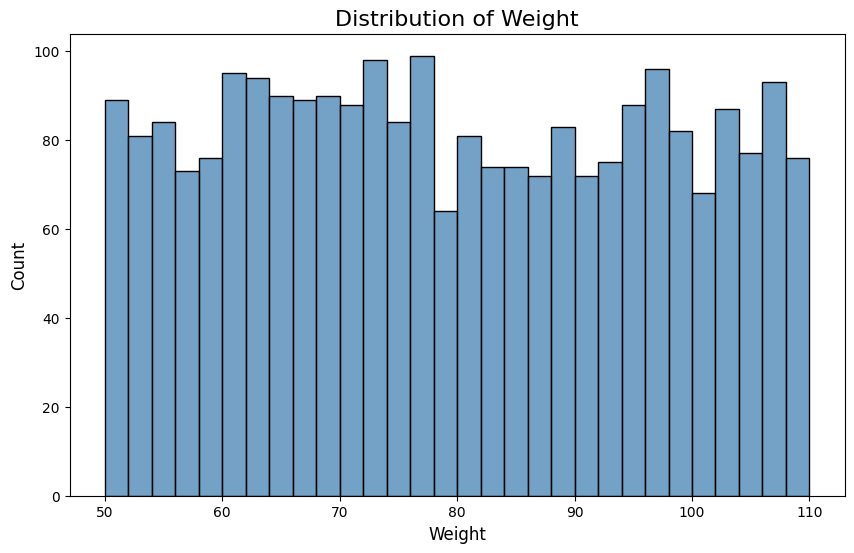

In [14]:
# Distribution of the Weight in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Weight', color="steelblue", bins=30, stat="count")
plt.title("Distribution of Weight", fontsize=16)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

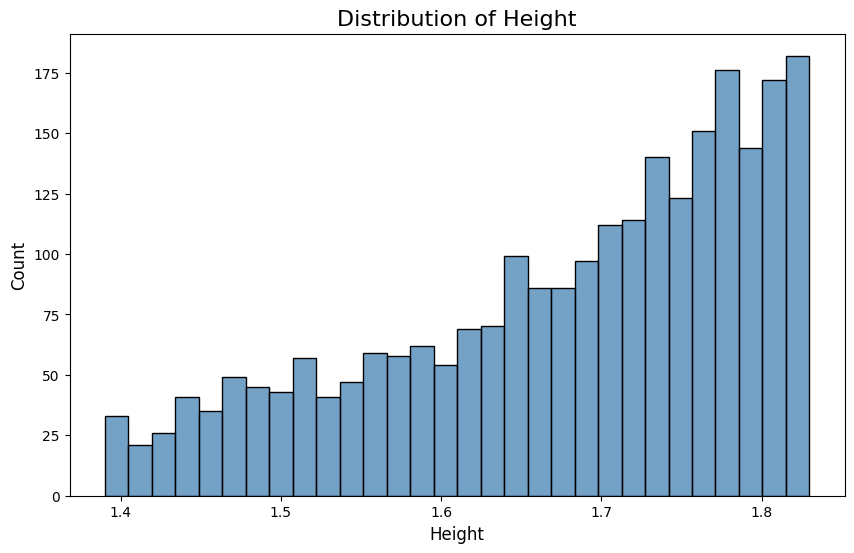

In [15]:
# Distribution of the Height in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Height', color="steelblue", bins=30, stat="count")
plt.title("Distribution of Height", fontsize=16)
plt.xlabel("Height", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

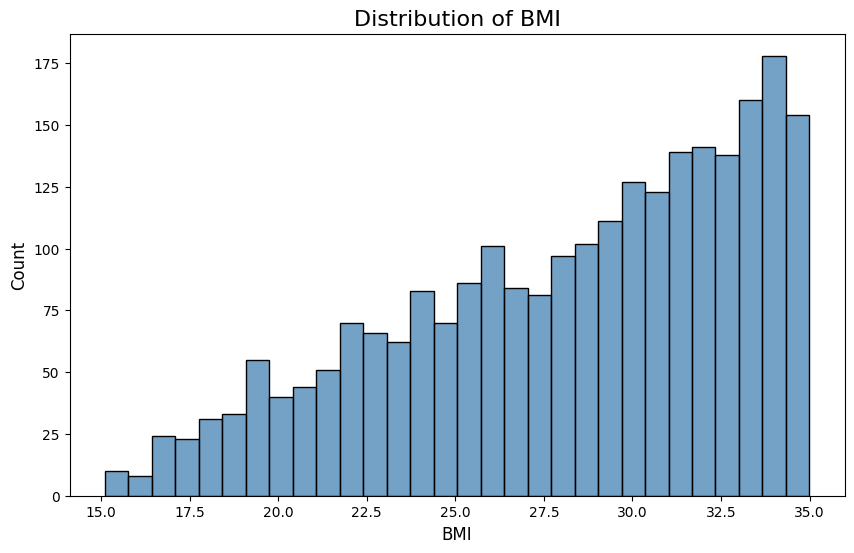

In [16]:
# Distribution of the BMI in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='BMI',  color="steelblue", bins=30, stat="count")
plt.title("Distribution of BMI", fontsize=16)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

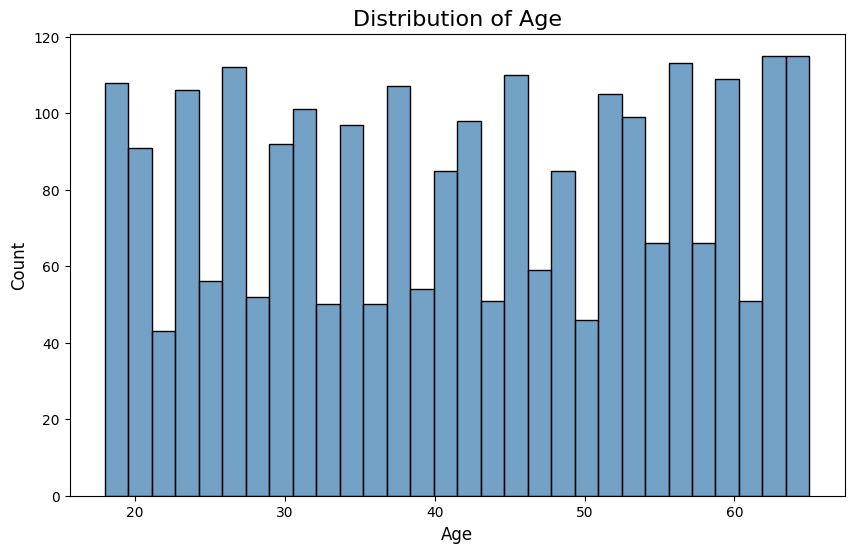

In [17]:
# Distribution of the Age in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Age', color="steelblue", bins=30, stat="count")
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

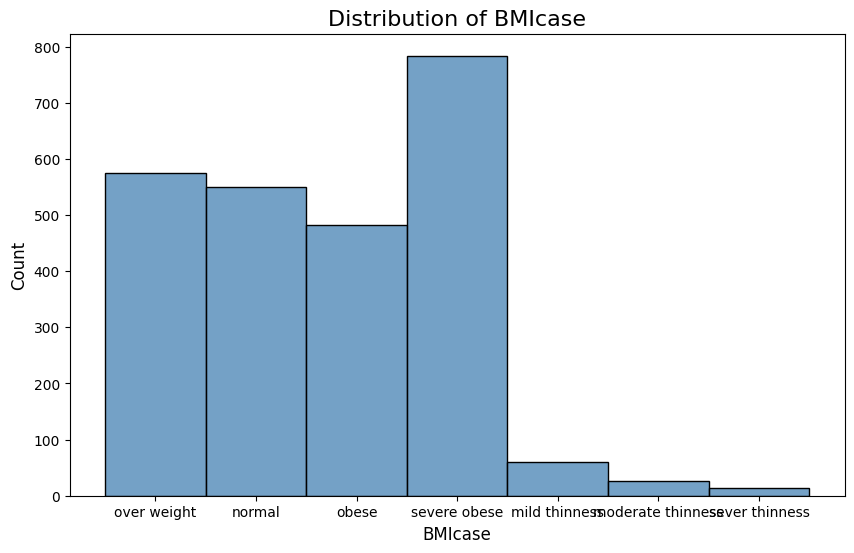

In [18]:
# Distribution of the BMIcase in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='BMIcase',  color="steelblue", bins=30, stat="count")
plt.title("Distribution of BMIcase", fontsize=16)
plt.xlabel("BMIcase", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

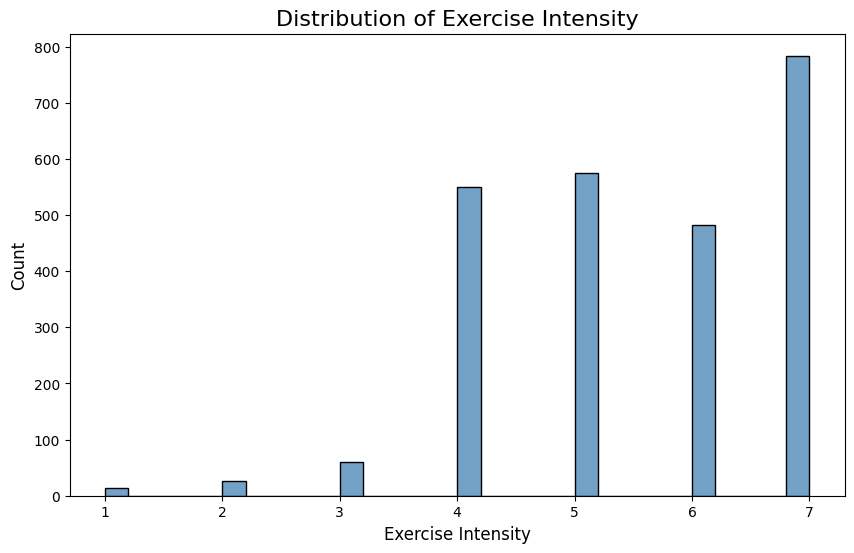

In [19]:
# Distribution of the Exercise Intensity in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Exercise Intensity',  color="steelblue", bins=30, stat="count")
plt.title("Distribution of Exercise Intensity", fontsize=16)
plt.xlabel("Exercise Intensity", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

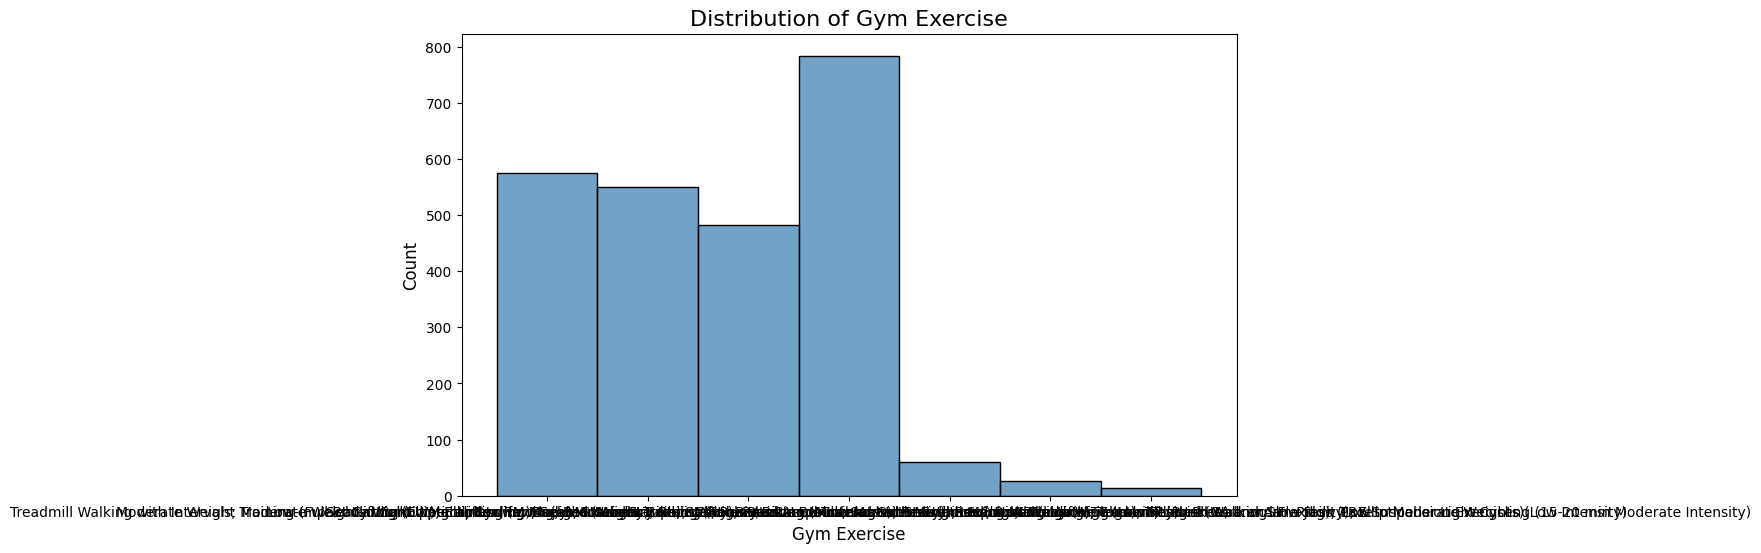

In [20]:
# Distribution of the Gym Exercise in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Gym Exercise',  color="steelblue", bins=30, stat="count")
plt.title("Distribution of Gym Exercise", fontsize=16)
plt.xlabel("Gym Exercise", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

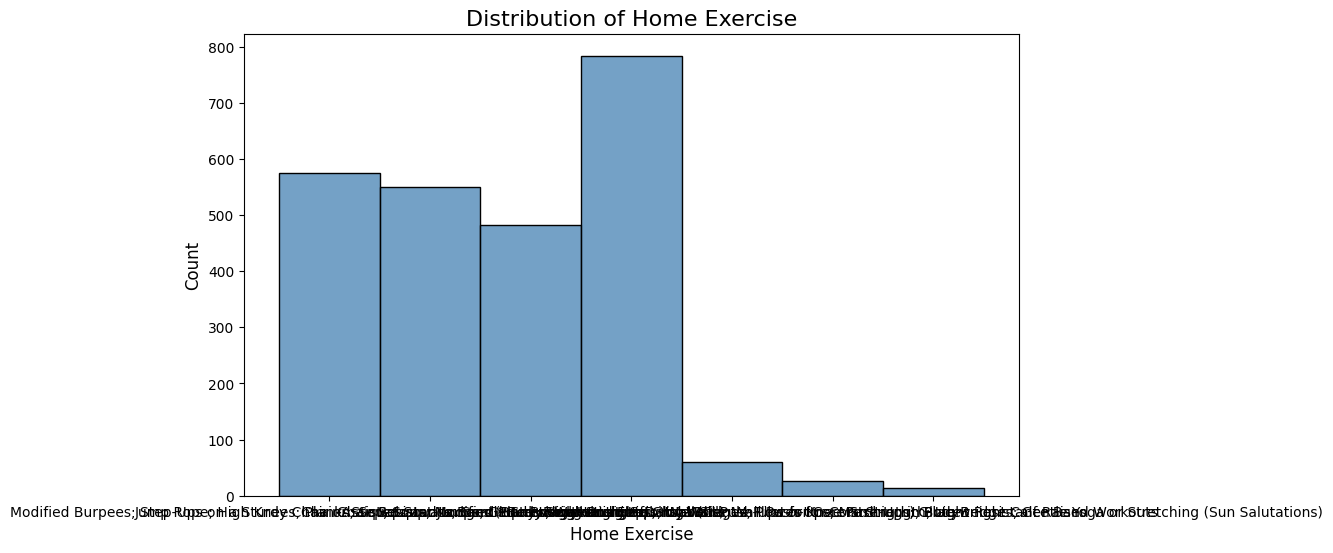

In [21]:
# Distribution of the Home Exercise in the data set

plt.figure(figsize=(10, 6))
sns.histplot(data=data_set, x='Home Exercise',  color="steelblue", bins=30, stat="count")
plt.title("Distribution of Home Exercise", fontsize=16)
plt.xlabel("Home Exercise", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [22]:
# Listing all numerical features
Numerical_Features = data_set.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features:")

data_set[Numerical_Features].head()

Numerical Features:


,Weight,Height,BMI,Age,Exercise Intensity
0,92.085190,1.760250,29.719488,59,5
1,61.089124,1.595499,23.997776,25,4
2,82.454037,1.816538,24.987499,50,4
3,101.713306,1.790696,31.720047,62,6
4,62.347337,1.543259,26.178219,35,5


In [23]:
# Identifing discrete numerical features
Discrete_Features = [col for col in Numerical_Features if data_set[col].nunique() < 20]
print("Discrete Numerical Features:", Discrete_Features)


Discrete Numerical Features: ['Exercise Intensity']


In [24]:
# Identifing Continuous features
Continuous_Features = [col for col in Numerical_Features if data_set[col].nunique() >= 20]
print("Continuous Numerical Features:", Continuous_Features)


Continuous Numerical Features: ['Weight', 'Height', 'BMI', 'Age']


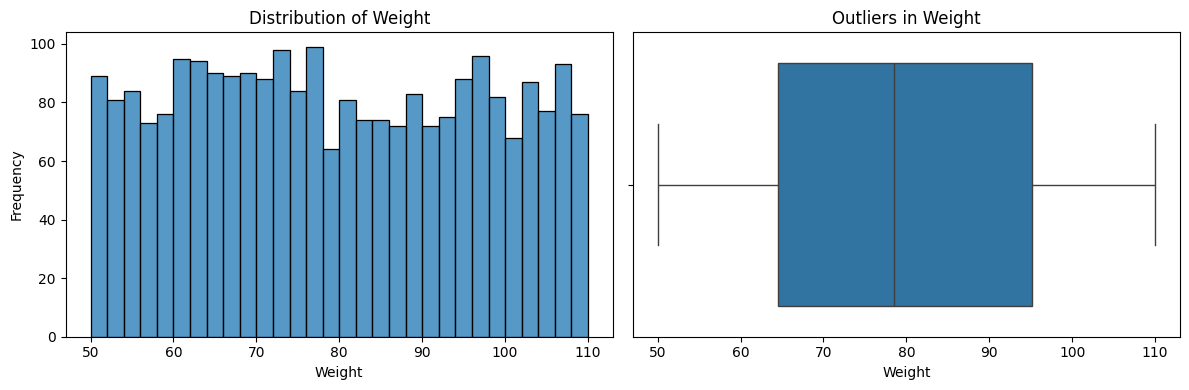

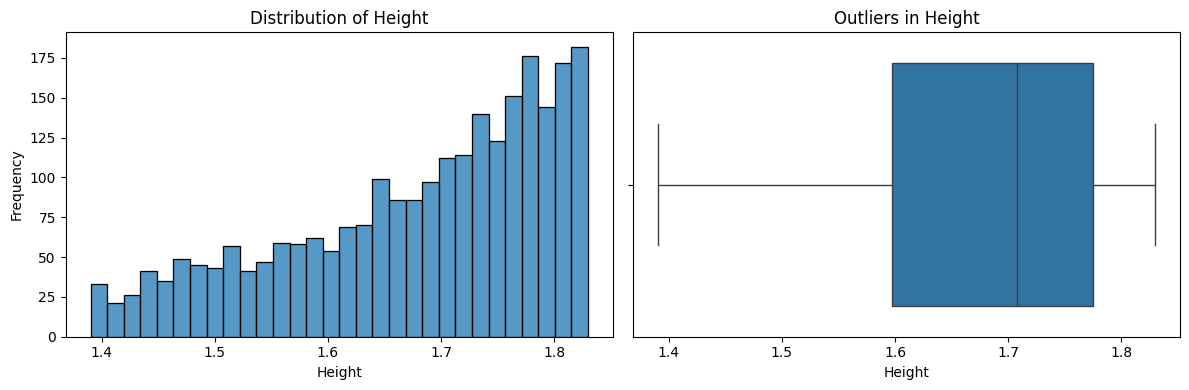

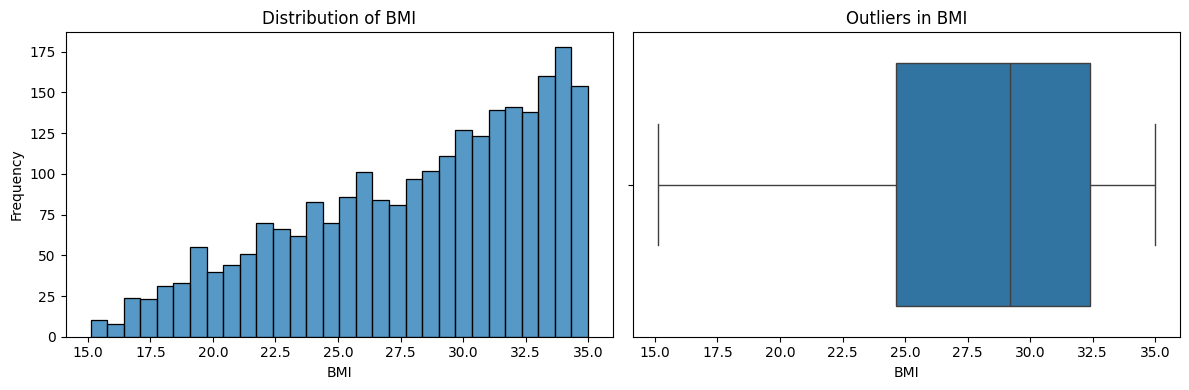

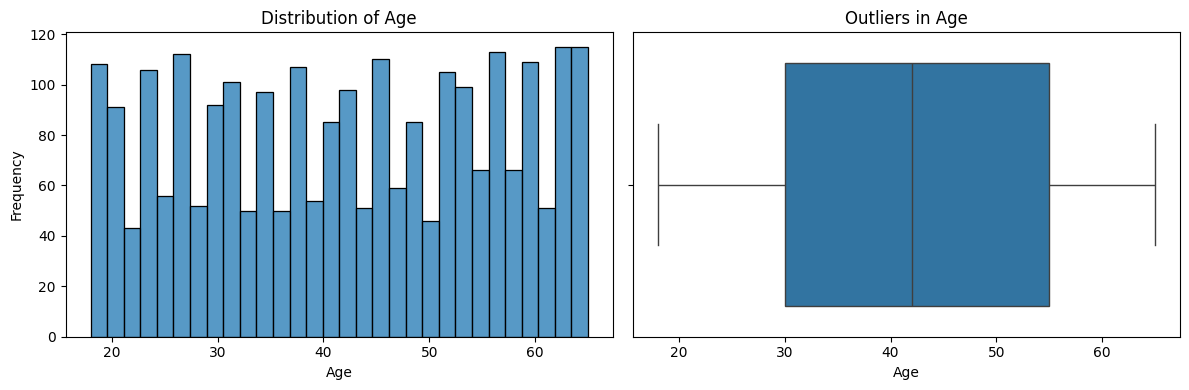

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through continuous features and numerical features

for col in Continuous_Features:  # Replace 'continuous_features' with your list of features
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 1 row and 2 columns

    # Left plot: Histogram
    sns.histplot(data_set[col],bins=30, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Frequency")

    # Right plot: Boxplot
    sns.boxplot(x=data_set[col], ax=axes[1])
    axes[1].set_title(f"Outliers in {col}")
    axes[1].set_xlabel(col)


    plt.tight_layout()
    plt.show()


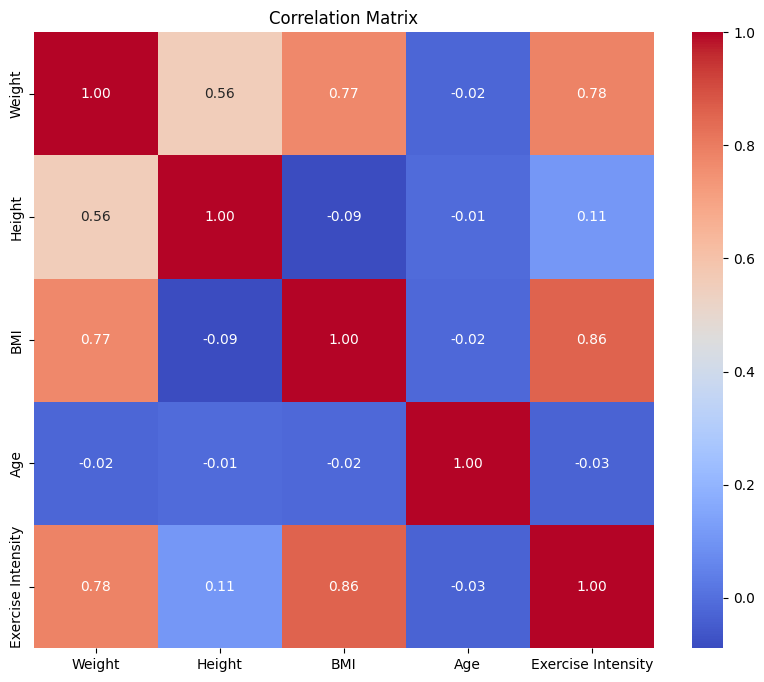

In [26]:
# Calculating correlation matrix
Correlation_Matrix = data_set[Numerical_Features].corr()

# Visualising correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(Correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
